In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


  
# Apply Hough transform on the blurred image. 
# detected_circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=130, param2=30, minRadius=0, maxRadius=0)

# print(detected_circles.shape)
# Draw circles that are detected. 
# if detected_circles is not None: 
  
#     # Convert the circle parameters a, b and r to integers. 
#     detected_circles = np.uint16(np.around(detected_circles)) 
  
#     for pt in detected_circles[0, :]: 
#         a, b, r = pt[0], pt[1], pt[2] 
  
#         # Draw the circumference of the circle. 
#         cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
#         # Draw a small circle (of radius 1) to show the center. 
#         cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
#         cv2.imshow("Detected Circle", img) 
#         cv2.waitKey(0) 

In [2]:
# Initiate parameter
FL = 8
res_w = 1024
res_h = 1280
pixel_size = 0.0048
dist = 4
tilt_angle = 10*np.pi/180
rad_bb = 37.3
fps = 240

# Calculate working distance
wd = dist/np.cos(tilt_angle)

# Calculate diameter of object
diameter_bb = rad_bb*2

# Calculate cx and cy (principal point of image center)
# cx = 1024/2
# cy = 1280/2

# Calculate sensor width and height
sensor_w = res_w * pixel_size
sensor_h = res_h * pixel_size

# Calculate fx and fy
# fx = FL*res_w/sensor_w
# fy = FL*res_h/sensor_h

# Calculate angle of view and field of view for this specific camera
AoV_H = 2*np.arctan(sensor_h/(2*FL)) # rad
AoV_W = 2*np.arctan(sensor_w/(2*FL)) # rad
FoV_H = 2* wd*1000* np.tan(AoV_H/2) # mm
FoV_W = 2* wd*1000* np.tan(AoV_W/2) # mm
# FoV_H2 = sensor_h*wd*1000/FL # mm
# FoV_W2 = sensor_w*wd*1000/FL # mm

In [3]:
# Read image. 
img = cv2.imread('img/IMG9.bmp') 
# img = cv2.convertScaleAbs(img,alpha=1.5,beta=20)
template = cv2.imread('img/ball2.bmp')
# template = cv2.convertScaleAbs(template,alpha=1.5,beta=20)


  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
temp_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
temp_gray_copy = temp_gray.copy()
# temp_gray = cv2.GaussianBlur(temp_gray, (5,5),0)
# temp_gray= cv2.bilateralFilter(temp_gray,1,5,5)
# filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# temp_gray=cv2.filter2D(temp_gray,-1,filter)


# blurred = cv2.GaussianBlur(gray, (15,15),0)
# blurred = cv2.blur(gray,(3,3))
# blurred = cv2.bilateralFilter(gray,11,25,25)
# edges = cv2.Canny(blurred,30,30)
# edges = cv2.Sobel(gray,cv2.CV_8U,1,1,ksize=5)

In [ ]:
# Detect the circle from the template image to make a perfect mask of the baseball
edges = cv2.Canny(gray,100,100)
# edges = cv2.Sobel(temp_gray,cv2.CV_8U,1,1,ksize=11)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 50, param1=130, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
a,b,r = circles[0,0,0],circles[0,0,1],circles[0,0,2]

In [18]:
# Detect the circle from the template image to make a perfect mask of the baseball
edges = cv2.Canny(temp_gray,100,100)
# edges = cv2.Sobel(temp_gray,cv2.CV_8U,1,1,ksize=11)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 50, param1=130, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
a,b,r = circles[0,0,0],circles[0,0,1],circles[0,0,2]

In [27]:
# Draw circle on black background template
background = np.zeros(temp_gray.shape,dtype=np.uint8)
cv2.circle(background,(a,b),r,(255,255,255),-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
test = cv2.bitwise_and(template,template,mask=background)


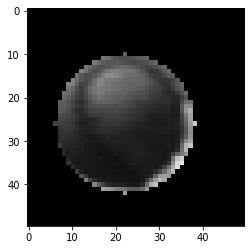

In [30]:
plt.imshow(test)
plt.show()

In [31]:
plt.imsave('ball_only.bmp',test)

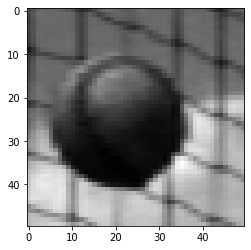

In [12]:
# Plot the original template out
plt.imshow(temp_gray,cmap='gray')
plt.show()

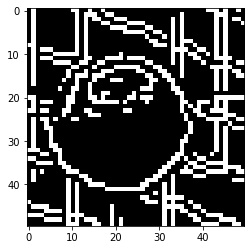

In [13]:
plt.imshow(edges,cmap='gray')
plt.show()

In [ ]:
# Template mataching 
# w,h = temp_gray.shape[::-1]

# # plt.imshow(gray,cmap='gray')
# # plt.imsave('ball2.bmp',img[760:810,430:480])
# # plt.show()
  
# methods = 'cv2.TM_CCOEFF_NORMED'
# methods = eval(methods)

# res = cv2.matchTemplate(gray,temp_gray,methods)
# min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# # top_left = min_loc
# top_left = max_loc
# bottom_right = (top_left[0] + w, top_left[1] + h)
# cv2.rectangle(gray,top_left, bottom_right, 255, 2)
# plt.imshow(gray,cmap='gray')
# plt.show()